# JanataHack: Mobility Analytics

## Problem Statement
Welcome to Sigma Cab Private Limited - a cab aggregator service. Their customers can download their app on smartphones and book a cab from any where in the cities they operate in. They, in turn search for cabs from various service providers and provide the best option to their client across available options. They have been in operation for little less than a year now. During this period, they have captured surge_pricing_type from the service providers.

You have been hired by Sigma Cabs as a Data Scientist and have been asked to build a predictive model, which could help them in predicting the surge_pricing_type pro-actively. This would in turn help them in matching the right cabs with the right customers quickly and efficiently.

## Data Dictionary


|Variable|Definition|
|--------|----------|
|**Trip_ID**|ID for TRIP (Can not be used for purposes of modelling)|
|**Trip_Distance**|The distance for the trip requested by the customer|
|**Type_of_Cab**|Category of the cab requested by the customer|
|**Customer_Since_Months**|Customer using cab services since n months; 0 month means current month|
|**Life_Style_Index**|Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour|
|**Confidence_Life_Style_Index**|Category showing confidence on the index mentioned above|
|**Destination_Type**|Sigma Cabs divides any destination in one of the 14 categories.|
|**Customer_Rating**|Average of life time ratings of the customer till date|
|**Cancellation_Last_1Month**|Number of trips cancelled by the customer in last 1 month|
|**Var1, Var2 and Var3**|Continuous variables masked by the company. Can be used for modelling purposes|
|**Gender**|Gender of the customer|
|**Surge_Pricing_Type**|Predictor variable can be of 3 types|

## Solution

### Libraries

In [54]:
# Import standard libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Import libraries for Preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

# Import libraries for models 
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier


# Import libraries for evaluations
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

### load the data to dataframe

In [2]:
train_data = pd.read_csv('Datasets/mobility/train.csv')
test_data = pd.read_csv('Datasets/mobility/test.csv')

In [3]:
# View the train data 

train_data.head(3)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2


In [4]:
# view the test_data 

test_data.head(3)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male


### EDA and Preprocessing of data

In [5]:
train_data.shape

(131662, 14)

Our dataset has 14 features 

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [7]:
# Check for any missing values 
train_data.isna().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

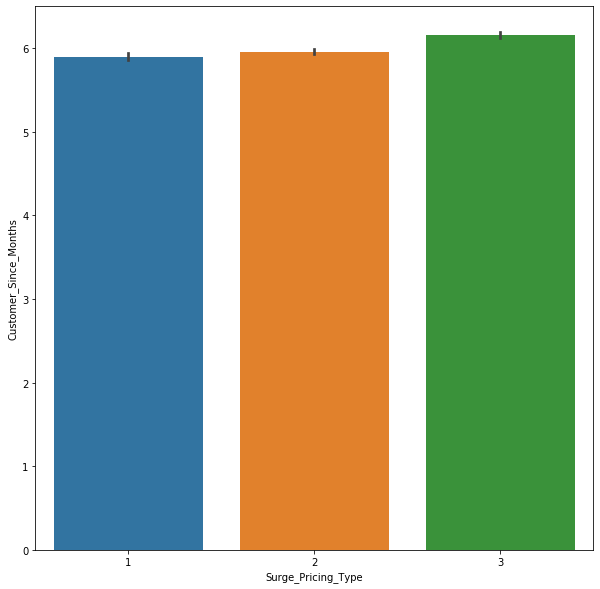

In [8]:
# importance of Customer_Since_Months in surge price type 

fig = plt.figure(figsize=(10,10))
sns.barplot(x='Surge_Pricing_Type', y= 'Customer_Since_Months',   data = train_data)

In [9]:
train_data.corr()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
Trip_Distance,1.000000,0.116812,0.509482,-0.054654,-0.007686,-0.045468,0.200456,0.231706,0.135928
Customer_Since_Months,0.116812,1.000000,0.135114,-0.050349,-0.006325,-0.009856,0.042637,0.113403,0.027827
Life_Style_Index,0.509482,0.135114,1.000000,0.205824,0.074023,-0.091307,0.234754,0.329312,-0.080108
Customer_Rating,-0.054654,-0.050349,0.205824,1.000000,0.003595,-0.010968,-0.302968,-0.227531,-0.155279
Cancellation_Last_1Month,-0.007686,-0.006325,0.074023,0.003595,1.000000,0.010953,0.095830,0.128686,0.185646
Var1,-0.045468,-0.009856,-0.091307,-0.010968,0.010953,1.000000,-0.046755,-0.061993,-0.040735
Var2,0.200456,0.042637,0.234754,-0.302968,0.095830,-0.046755,1.000000,0.683437,0.003437
Var3,0.231706,0.113403,0.329312,-0.227531,0.128686,-0.061993,0.683437,1.000000,-0.039309
Surge_Pricing_Type,0.135928,0.027827,-0.080108,-0.155279,0.185646,-0.040735,0.003437,-0.039309,1.000000


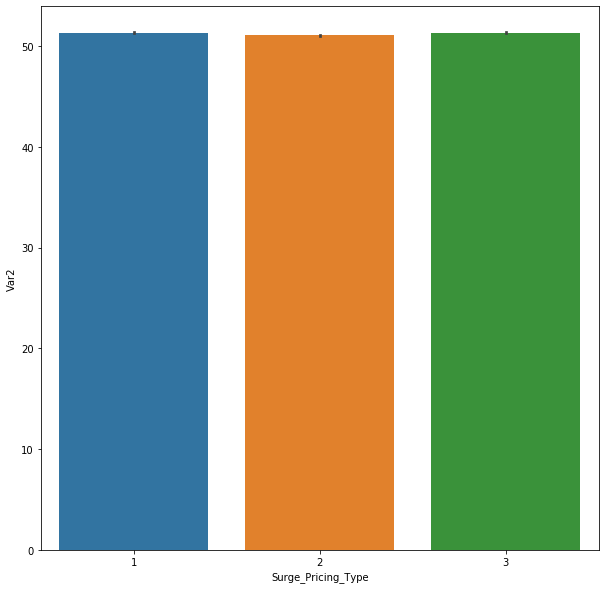

In [10]:
# importance of var2 in surge price type 

fig = plt.figure(figsize=(10,10))
sns.barplot( x ='Surge_Pricing_Type', y= 'Var2',  data = train_data)

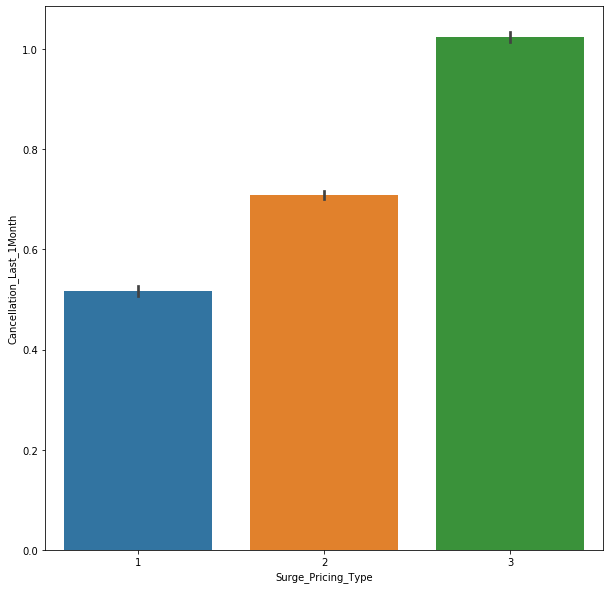

In [11]:
# importance of var2 in surge price type 

fig = plt.figure(figsize=(10,10))
sns.barplot( x ='Surge_Pricing_Type', y= 'Cancellation_Last_1Month',  data = train_data)

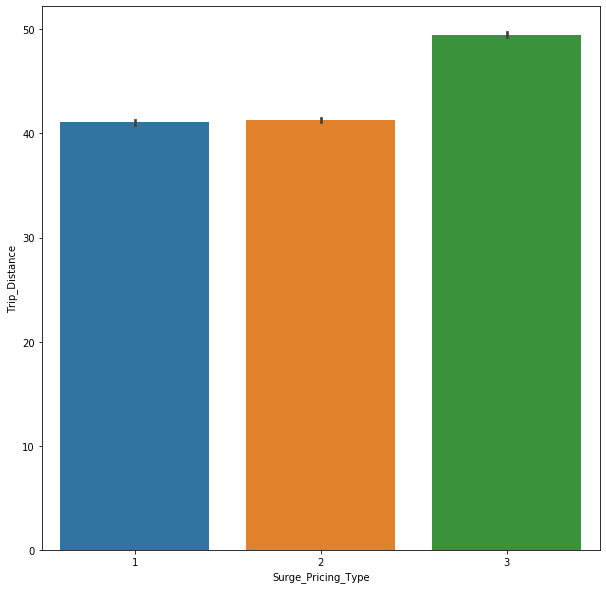

In [12]:
# importance of distance in surge price type 

fig = plt.figure(figsize=(10,10))
sns.barplot( x ='Surge_Pricing_Type',y ='Trip_Distance', data = train_data)

In [13]:
train_data.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [15]:
# drop the id column 
train_data.drop('Trip_ID', axis = 1, inplace = True)

In [16]:
# Fill the missing values
train_data['Type_of_Cab'] = train_data['Type_of_Cab'].fillna(train_data['Type_of_Cab'].dropna().mode().values[0])
train_data['Customer_Since_Months'] = train_data['Customer_Since_Months'].fillna(train_data['Customer_Since_Months'].dropna().median())
train_data['Life_Style_Index']  = train_data['Life_Style_Index'].fillna(train_data['Life_Style_Index'].dropna().mean())
train_data['Confidence_Life_Style_Index'] = train_data['Confidence_Life_Style_Index'].fillna(train_data['Confidence_Life_Style_Index'].dropna().mode().values[0])
train_data['Var1'] = train_data['Var1'].fillna(train_data['Var1'].dropna().median())

In [17]:
train_data.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,B,1.0,2.427690,A,A,3.90500,0,40.0,46,60,Female,2
1,29.47,B,10.0,2.782450,B,A,3.45000,0,38.0,56,78,Male,2
2,41.58,B,10.0,2.802064,B,E,3.50125,2,61.0,56,77,Male,2
3,61.56,C,10.0,2.802064,B,A,3.45375,0,61.0,52,74,Male,3
4,54.95,C,10.0,3.034530,B,A,3.40250,4,51.0,49,102,Male,2


In [18]:
label = LabelEncoder()
train_data['Type_of_Cab'] = label.fit_transform(train_data['Type_of_Cab'])
train_data['Confidence_Life_Style_Index'] = label.fit_transform(train_data['Confidence_Life_Style_Index'])
train_data['Gender'] = label.fit_transform(train_data['Gender'])
train_data['Surge_Pricing_Type'] = label.fit_transform(train_data['Surge_Pricing_Type'])
train_data['Destination_Type'] = label.fit_transform(train_data['Destination_Type'])

In [19]:
train_data.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,1,1.0,2.427690,0,0,3.90500,0,40.0,46,60,0,1
1,29.47,1,10.0,2.782450,1,0,3.45000,0,38.0,56,78,1,1
2,41.58,1,10.0,2.802064,1,4,3.50125,2,61.0,56,77,1,1
3,61.56,2,10.0,2.802064,1,0,3.45375,0,61.0,52,74,1,2
4,54.95,2,10.0,3.034530,1,0,3.40250,4,51.0,49,102,1,1


In [20]:
train_data.isna().sum()

Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                131662 non-null  float64
 1   Type_of_Cab                  131662 non-null  int32  
 2   Customer_Since_Months        131662 non-null  float64
 3   Life_Style_Index             131662 non-null  float64
 4   Confidence_Life_Style_Index  131662 non-null  int32  
 5   Destination_Type             131662 non-null  int32  
 6   Customer_Rating              131662 non-null  float64
 7   Cancellation_Last_1Month     131662 non-null  int64  
 8   Var1                         131662 non-null  float64
 9   Var2                         131662 non-null  int64  
 10  Var3                         131662 non-null  int64  
 11  Gender                       131662 non-null  int32  
 12  Surge_Pricing_Type           131662 non-null  int64  
dtyp

In [22]:
train_data['Surge_Pricing_Type'].unique()

array([1, 2, 0], dtype=int64)

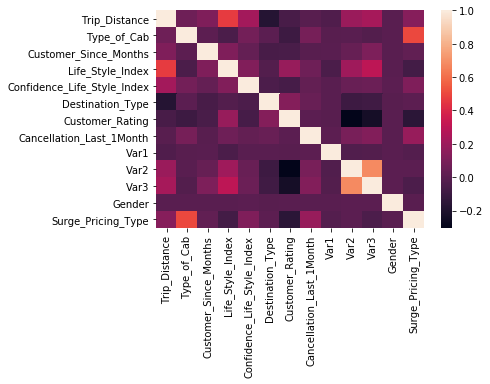

In [23]:
sns.heatmap(train_data.corr())

### Modelling

In [46]:
# Split data into X and Y

X = train_data.drop('Surge_Pricing_Type', axis =1 )
y = train_data['Surge_Pricing_Type']

In [47]:
data_dmatrix = xgb.DMatrix(data = X, label = y)

In [48]:
X.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,6.77,1,1.0,2.427690,0,0,3.90500,0,40.0,46,60,0
1,29.47,1,10.0,2.782450,1,0,3.45000,0,38.0,56,78,1
2,41.58,1,10.0,2.802064,1,4,3.50125,2,61.0,56,77,1
3,61.56,2,10.0,2.802064,1,0,3.45375,0,61.0,52,74,1
4,54.95,2,10.0,3.034530,1,0,3.40250,4,51.0,49,102,1


In [49]:
y.head()

0    1
1    1
2    1
3    2
4    1
Name: Surge_Pricing_Type, dtype: int64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [51]:
np.random.seed(42)
models = {'LogisticRegression':LogisticRegression(),
          'XGBClassifier' :XGBClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'RandomForestClassifier':RandomForestClassifier()    
}
results = {}
# Loop through the models dictionary items, fitting the model on the training data
# and appending the model name and model score on the test data to the results dictionary
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)
    print(model_name)
results

C:\Users\anjit\Desktop\ML_Project\env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression
XGBClassifier
AdaBoostClassifier
RandomForestClassifier


{'LogisticRegression': 0.6369574298408841,
 'XGBClassifier': 0.6856415903998785,
 'AdaBoostClassifier': 0.6803630425701591,
 'RandomForestClassifier': 0.6824896517677439}

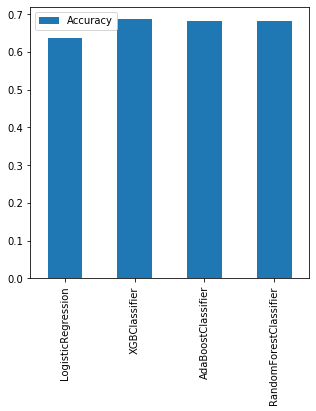

In [52]:
# Create a pandas dataframe with the data as the values of the results dictionary,
# the index as the keys of the results dictionary and a single column called accuracy.
# Be sure to save the dataframe to a variable.
results_df = pd.DataFrame(results.values(), 
                          results.keys(), 
                          columns=["Accuracy"])

# Create a bar plot of the results dataframe using plot.bar()
results_df.plot.bar();

Clearly we can see that XGBClassifier works best on the data.

In [35]:
np.random.seed(42)
model = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)


0.6940341016974898

In [36]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=360, n_jobs=1,
              nthread=5, num_class=3, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [37]:

model.score(X_test, y_test)

0.6940341016974898

In [38]:
X.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,6.77,1,1.0,2.427690,0,0,3.90500,0,40.0,46,60,0
1,29.47,1,10.0,2.782450,1,0,3.45000,0,38.0,56,78,1
2,41.58,1,10.0,2.802064,1,4,3.50125,2,61.0,56,77,1
3,61.56,2,10.0,2.802064,1,0,3.45375,0,61.0,52,74,1
4,54.95,2,10.0,3.034530,1,0,3.40250,4,51.0,49,102,1


In [39]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

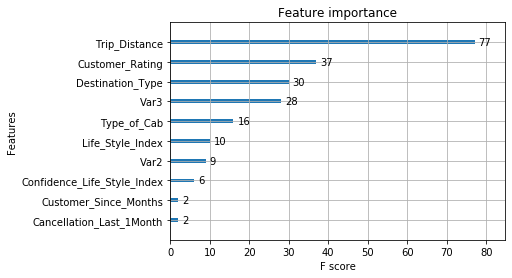

In [40]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [57]:
# Fit model using each importance as a threshold
thresholds = np.sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.017, n=12, Accuracy: 68.56%
Thresh=0.023, n=11, Accuracy: 68.56%
Thresh=0.029, n=10, Accuracy: 68.31%
Thresh=0.032, n=9, Accuracy: 67.89%
Thresh=0.057, n=8, Accuracy: 67.60%
Thresh=0.064, n=7, Accuracy: 67.60%
Thresh=0.075, n=6, Accuracy: 67.50%
Thresh=0.092, n=5, Accuracy: 67.45%
Thresh=0.109, n=4, Accuracy: 67.52%
Thresh=0.121, n=3, Accuracy: 67.45%
Thresh=0.131, n=2, Accuracy: 67.36%
Thresh=0.250, n=1, Accuracy: 67.12%


In [132]:
Id = test_data['Trip_ID']

In [133]:
test_data.isna().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    13158
Customer_Since_Months           3966
Life_Style_Index               13327
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           46789
Var2                               0
Var3                               0
Gender                             0
dtype: int64

In [134]:
# drop the id column 
test_data.drop('Trip_ID', axis = 1, inplace = True)

In [135]:
# Fill the missing values
test_data['Type_of_Cab'] = test_data['Type_of_Cab'].fillna(test_data['Type_of_Cab'].dropna().mode().values[0])
test_data['Customer_Since_Months'] = test_data['Customer_Since_Months'].fillna(test_data['Customer_Since_Months'].dropna().median())
test_data['Life_Style_Index']  = test_data['Life_Style_Index'].fillna(test_data['Life_Style_Index'].dropna().mean())
test_data['Confidence_Life_Style_Index'] = test_data['Confidence_Life_Style_Index'].fillna(test_data['Confidence_Life_Style_Index'].dropna().mode().values[0])
test_data['Var1'] = test_data['Var1'].fillna(test_data['Var1'].dropna().median())

In [136]:
label = LabelEncoder()
test_data['Type_of_Cab'] = label.fit_transform(test_data['Type_of_Cab'])
test_data['Confidence_Life_Style_Index'] = label.fit_transform(test_data['Confidence_Life_Style_Index'])
test_data['Gender'] = label.fit_transform(test_data['Gender'])
test_data['Destination_Type'] = label.fit_transform(test_data['Destination_Type'])

In [137]:
test_data.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,9.44,0,10.0,2.57438,0,1,3.68000,2,61.0,46,63,1
1,32.15,1,10.0,2.85143,0,0,1.59375,0,65.0,49,80,0
2,10.38,2,4.0,2.70530,0,3,4.50500,0,61.0,47,74,1
3,14.94,1,6.0,2.48159,2,4,4.53000,0,63.0,43,54,1
4,32.03,1,7.0,2.81598,0,10,4.60125,3,96.0,44,56,1


In [138]:
#predictions = model.predict(test_data)
#output = pd.DataFrame({'Trip_ID': Id, 'Surge_Pricing_Type': predictions})
#output.to_csv('my_submission.csv', index = False)